In [18]:
import sys, os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from PIL import Image
from PIL import ImageDraw
sys.path.append('..')
from utilitaire.imgAiTrainer.imgAiTrainer import Trainer

tr = Trainer()

In [19]:
def listImg(nb,x,y):
    lImg = []
    lLabel = []
    for i in range(nb):
        cercleT = tr.createCercle((x,y),True)
        img = Image.open("../../Assets/imgAiTrainer/cercle.png")
        imgGray = tf.keras.preprocessing.image.img_to_array(img, data_format=None, dtype=None)
        lImg.append(imgGray)
        lLabel.append((cercleT[0][0],cercleT[0][1],cercleT[1],cercleT[2]))
    lImg = np.array(lImg)
    lLabel = np.array(lLabel)
    return lImg, lLabel


In [20]:
def show_sample(img):
  figure, axis = plt.subplots(1,1)
  axis.imshow(img)


In [21]:
def show_sample2(img,img2):
  figure, (axis1, axis2) = plt.subplots(1,2)
  axis1.imshow(img)
  axis2.imshow(img2)

In [22]:
img_shape = (600,800,3)

In [23]:
l2 = None
#inputs = keras.Input(shape=img_shape)
#conv1 = keras.layers.Conv2D(16,5,padding='same',activation='relu',kernel_initializer='glorot_normal',kernel_regularizer=l2)(inputs)
#conv1 = keras.layers.BatchNormalization(momentum=0.99)(conv1)
#conv2 = keras.layers.Conv2D(32,5,padding='same',activation='relu',kernel_initializer='glorot_normal',kernel_regularizer=l2)(conv1)
#conv2 = keras.layers.BatchNormalization(momentum=0.99)(conv2)
#outputs = keras.layers.Conv2D(1,5,padding='same',activation='relu',kernel_initializer='glorot_normal',kernel_regularizer=l2)(conv2)

model = keras.models.Sequential()
model.add(keras.layers.Convolution2D(32, 5, 5, padding='same',  activation='relu', input_shape=img_shape))
model.add(keras.layers.Convolution2D(64, 5, 5, padding='same',  activation='relu'))
model.add(keras.layers.Convolution2D(128, 5, 5, padding='same',  activation='relu'))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(4, activation='linear'))

model.summary()

opt = keras.optimizers.Adam(learning_rate=1e-4)
model.compile(optimizer=opt,loss='mean_squared_error')



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 120, 160, 32)      2432      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 32, 64)        51264     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 5, 7, 128)         204928    
_________________________________________________________________
flatten (Flatten)            (None, 4480)              0         
_________________________________________________________________
dense (Dense)                (None, 100)               448100    
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 404       
Total params: 707,128
Trainable params: 707,128
Non-trainable params: 0
__________________________________________________

In [12]:
limg , lLabel = listImg(1000,800,600)
limg.shape

(1000, 600, 800, 3)

In [64]:
history = model.fit(limg, lLabel,batch_size=10, epochs=50, verbose=1)
print("Finished training the model")

Epoch 1/50
100/100 [==============================] - 13s 128ms/step - loss: 77.2152
Epoch 2/50
100/100 [==============================] - 13s 130ms/step - loss: 50.9980
Epoch 3/50
100/100 [==============================] - 13s 128ms/step - loss: 37.5372
Epoch 4/50
100/100 [==============================] - 13s 127ms/step - loss: 31.5225
Epoch 5/50
100/100 [==============================] - 13s 128ms/step - loss: 26.4517
Epoch 6/50
100/100 [==============================] - 13s 128ms/step - loss: 22.9044
Epoch 7/50
100/100 [==============================] - 13s 128ms/step - loss: 18.8875
Epoch 8/50
100/100 [==============================] - 13s 129ms/step - loss: 15.9740
Epoch 9/50
100/100 [==============================] - 13s 127ms/step - loss: 13.6130
Epoch 10/50
100/100 [==============================] - 13s 128ms/step - loss: 11.9952
Epoch 11/50
100/100 [==============================] - 13s 129ms/step - loss: 10.4993
Epoch 12/50
100/100 [==============================] - 13s 129m

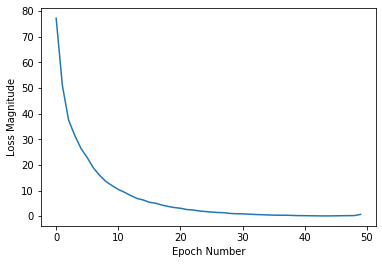

In [275]:
import matplotlib.pyplot as plt

plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.plot(history.history['loss'])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(1, 600, 800, 3)

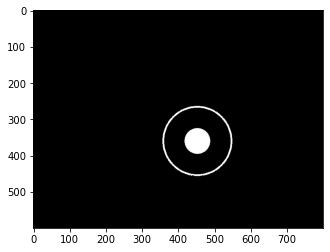

In [37]:
cercleT = tr.createCercle((800,600),True)
img = Image.open("../../Assets/imgAiTrainer/cercle.png")

imgGray = tf.keras.preprocessing.image.img_to_array(img, data_format=None, dtype=None)
show_sample(imgGray)
imgGrayIa = np.expand_dims(imgGray, axis=0)
imgGrayIa.shape



In [38]:
%%time
y_pred = model.predict(imgGrayIa)

Wall time: 124 ms


In [39]:
print("Prédiction : ",y_pred)
print("Image : ",cercleT[0],cercleT[1],cercleT[2])

Prédiction :  [[-2.7078576  -0.24967328  2.4852376  -2.6218982 ]]
Image :  (453.0, 360.0) 40.0 96.0


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


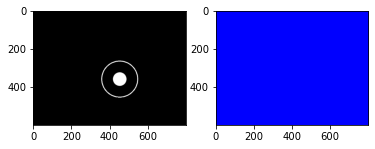

In [40]:
y_pred=y_pred[0]
img = Image.new('RGBA', (800,600),"blue" )
draw = ImageDraw.Draw(img)
draw.ellipse([round(y_pred[0]-y_pred[2]),round(y_pred[1]-y_pred[2]),round(y_pred[0]+y_pred[2]),round(y_pred[1]+y_pred[2])], fill = 'white', outline ='black', width=5)
draw.ellipse([round(y_pred[0]-y_pred[3]),round(y_pred[1]-y_pred[3]),round(y_pred[0]+y_pred[3]),round(y_pred[1]+y_pred[3])], fill = None, outline ='white', width=5)
imgGrayPre = tf.keras.preprocessing.image.img_to_array(img, data_format=None, dtype=None)
show_sample2(imgGray,imgGrayPre)